### Import packages

In [132]:
import pandas as pd
pd.set_option('display.max_columns', None)


import numpy as np
import math
import pickle
import folium
import json

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from xgboost import XGBClassifier


from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge, Ridge
from sklearn.ensemble import HistGradientBoostingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from catboost import Pool, CatBoostRegressor

# Modeling

### Load Data

In [32]:
df_train = pd.read_csv('../data/train_labels_final.csv')
df_train = df_train.drop('Unnamed: 0',axis=1)
df_train

,cell_id,dates,value,neighbor_1,neighbor_2,neighbor_3,neighbor_4,neighbor_5,neighbor_6,neighbor_7,...,neighbor_14,neighbor_15,neighbor_16,neighbor_17,neighbor_18,neighbor_19,neighbor_20,latitude,longitude,region
0,00c4db22-a423-41a4-ada6-a8b1b04153a4,2013-01-01,12.7,2.0,1.6,6.4,3.2,2.7,2.0,2.8,...,6.6,10.60,8.4,2.88,4.10,7.24,4.00,-121.9,41.2,other
1,018cf1a1-f945-4097-9c47-0c4690538bb5,2013-01-01,20.4,2.0,1.6,6.4,3.2,2.7,2.0,2.8,...,10.6,6.60,8.4,2.88,4.10,7.24,4.00,-120.6,39.7,sierras
2,01be2cc7-ef77-4e4d-80ed-c4f8139162c3,2013-01-01,37.0,2.0,1.6,6.4,3.2,2.7,2.0,2.8,...,10.6,6.60,8.4,2.88,7.24,4.10,4.00,-119.6,38.3,sierras
3,02c3ec4a-8de4-4284-9ec1-5a942d3d098e,2013-01-01,2.3,2.0,1.6,3.2,6.4,2.7,2.0,2.8,...,5.9,4.10,4.0,3.40,2.60,2.30,7.20,-107.2,44.6,other
4,02cf33c2-c8e2-48b9-bf72-92506e97e251,2013-01-01,8.0,2.0,1.6,3.2,6.4,2.7,2.0,2.8,...,5.9,4.10,4.0,3.40,2.60,2.30,10.60,-106.6,40.4,central rockies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50453,fd4492f2-8aa9-4279-bdc0-73991786943f,2019-12-31,1.3,1.3,2.7,6.7,4.0,2.1,1.5,2.8,...,9.9,5.30,6.9,3.70,3.90,1.50,9.93,-105.1,38.9,central rockies
50454,fde3221a-9ce3-45a9-857f-bd196b07aa05,2019-12-31,5.6,1.3,2.7,6.7,4.0,2.1,1.5,2.8,...,9.9,5.30,6.9,3.70,3.90,1.50,9.93,-106.1,39.3,central rockies
50455,fdeb8912-f9d1-445d-aadb-e943534f67fe,2019-12-31,8.8,1.3,2.7,6.7,4.0,2.1,1.5,2.8,...,9.9,5.30,6.9,3.70,9.93,3.90,1.50,-107.9,37.8,central rockies
50456,fe33672e-7ea7-4c5d-8639-96b2cc7edb0c,2019-12-31,2.9,1.3,2.7,4.0,6.7,2.1,1.5,2.8,...,4.1,9.93,5.3,10.92,6.90,3.70,6.00,-122.0,43.9,other


In [35]:
#Make sure our data types is correct
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50458 entries, 0 to 50457
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cell_id      50458 non-null  object 
 1   dates        50458 non-null  object 
 2   value        50458 non-null  float64
 3   neighbor_1   50458 non-null  float64
 4   neighbor_2   50458 non-null  float64
 5   neighbor_3   50458 non-null  float64
 6   neighbor_4   50458 non-null  float64
 7   neighbor_5   50458 non-null  float64
 8   neighbor_6   50458 non-null  float64
 9   neighbor_7   50458 non-null  float64
 10  neighbor_8   42424 non-null  float64
 11  neighbor_9   43759 non-null  float64
 12  neighbor_10  47152 non-null  float64
 13  neighbor_11  49849 non-null  float64
 14  neighbor_12  50458 non-null  float64
 15  neighbor_13  50458 non-null  float64
 16  neighbor_14  50458 non-null  float64
 17  neighbor_15  50458 non-null  float64
 18  neighbor_16  50458 non-null  float64
 19  neig

In [54]:
df_train.isna().sum()/len(df_train)

cell_id        0.000000
dates          0.000000
value          0.000000
neighbor_1     0.000000
neighbor_2     0.000000
neighbor_3     0.000000
neighbor_4     0.000000
neighbor_5     0.000000
neighbor_6     0.000000
neighbor_7     0.000000
neighbor_8     0.159222
neighbor_9     0.132764
neighbor_10    0.065520
neighbor_11    0.012069
neighbor_12    0.000000
neighbor_13    0.000000
neighbor_14    0.000000
neighbor_15    0.000000
neighbor_16    0.000000
neighbor_17    0.000000
neighbor_18    0.000000
neighbor_19    0.000000
neighbor_20    0.000000
latitude       0.000000
longitude      0.000000
region         0.000000
dtype: float64

## Train-test-split

Let's do our train-test-split before we begin to build our pipelines.

In [33]:
X_train = df_train.drop(['cell_id','dates','value'],axis=1)
y_train = df_train['value']

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Modeling EDA

<AxesSubplot:>

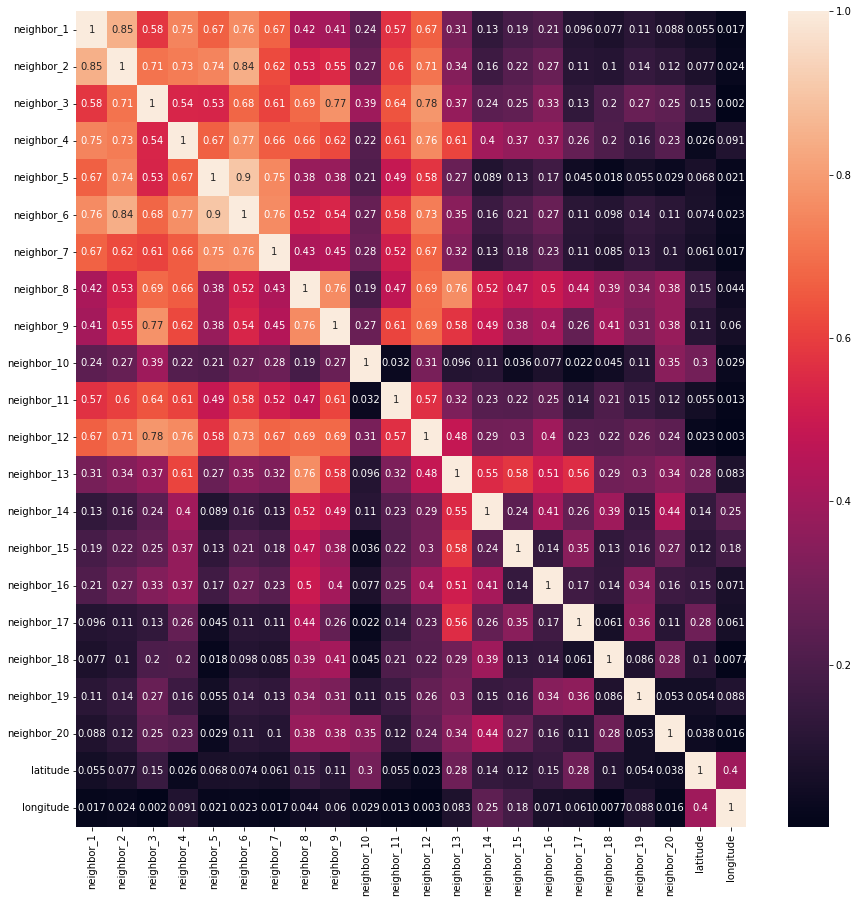

In [34]:
fig, ax = plt.subplots(figsize = (15,15))

sns.heatmap(abs(X_train.corr()),annot=True, ax=ax)

It seems like our top 13 nearest neighbors of ground measured stations are highly correlated. This is possibly because top 13 nearest stations to the grid cell is also near to each other in distance and therefore, the SWE values of the top 13 nearest neighbors are correlated to each other by distance. To reduce the multicollinearity between these stations, we can perform PCA on the first 13 neighbors as part of our pipeline.

## Modeling Building

We are going to begin our model testing with our training data. We will be using pipelines functions, and Function transformers to smooth our model building process and ensure no data leakage takes place in our workflow.

### Functions

In [36]:
def grab_numeric(df):
    
    """
    Helper function to grab only numeric columns from our dataframe.
    """
    return df.select_dtypes(include=['float', 'int'])

In [37]:
def grab_object(df):
    
    """
    Helper function to grab only categorical columns from our dataframe.
    """
    
    return df.select_dtypes(include=['object'])

In [79]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=5):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} R_squared
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

Some of these models take a very long time to run. The function below will pickle the models we have to [pickled_models](link).

In [40]:
def pickle_model (model,model_file_name):
    
    """
    This helper function takes in your model and save it under modelname, in a folder parallel to the parent director called
    pickled_models.
    
    model: the model to save.
    model_file_name: (str) file name to save the model as. 
    """
    print (f'Saving model as {model_file_name}...')
    pickle.dump(model,open(f'./pickled_models/{model_file_name}.sav','wb'))
    print(f'{model_file_name} succesfully saved.')
           
    
    

In [41]:
def load_pickle(fullfilepath):
    
    file = open(fullfilepath,'rb')
    object_file = pickle.load(file)
    file.close()
    
    return object_file

#### Testing functions

In [43]:
#Sniff test, ensuring function outputs what we want

num_df=grab_numeric(df_train)
num_df

,value,neighbor_1,neighbor_2,neighbor_3,neighbor_4,neighbor_5,neighbor_6,neighbor_7,neighbor_8,neighbor_9,...,neighbor_13,neighbor_14,neighbor_15,neighbor_16,neighbor_17,neighbor_18,neighbor_19,neighbor_20,latitude,longitude
0,12.7,2.0,1.6,6.4,3.2,2.7,2.0,2.8,NaN,3.7,...,5.9,6.6,10.60,8.4,2.88,4.10,7.24,4.00,-121.9,41.2
1,20.4,2.0,1.6,6.4,3.2,2.7,2.0,2.8,NaN,3.7,...,5.9,10.6,6.60,8.4,2.88,4.10,7.24,4.00,-120.6,39.7
2,37.0,2.0,1.6,6.4,3.2,2.7,2.0,2.8,NaN,3.7,...,5.9,10.6,6.60,8.4,2.88,7.24,4.10,4.00,-119.6,38.3
3,2.3,2.0,1.6,3.2,6.4,2.7,2.0,2.8,6.6,3.7,...,4.3,5.9,4.10,4.0,3.40,2.60,2.30,7.20,-107.2,44.6
4,8.0,2.0,1.6,3.2,6.4,2.7,2.0,2.8,6.6,3.7,...,4.3,5.9,4.10,4.0,3.40,2.60,2.30,10.60,-106.6,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50453,1.3,1.3,2.7,6.7,4.0,2.1,1.5,2.8,4.1,6.1,...,5.5,9.9,5.30,6.9,3.70,3.90,1.50,9.93,-105.1,38.9
50454,5.6,1.3,2.7,6.7,4.0,2.1,1.5,2.8,4.1,6.1,...,5.5,9.9,5.30,6.9,3.70,3.90,1.50,9.93,-106.1,39.3
50455,8.8,1.3,2.7,6.7,4.0,2.1,1.5,2.8,6.1,7.1,...,5.5,9.9,5.30,6.9,3.70,9.93,3.90,1.50,-107.9,37.8
50456,2.9,1.3,2.7,4.0,6.7,2.1,1.5,2.8,7.1,6.1,...,9.9,4.1,9.93,5.3,10.92,6.90,3.70,6.00,-122.0,43.9


In [44]:
#Sniff test, ensuring function outputs what we want

cat_df = grab_object(df_train)
cat_df.head()

,cell_id,dates,region
0,00c4db22-a423-41a4-ada6-a8b1b04153a4,2013-01-01,other
1,018cf1a1-f945-4097-9c47-0c4690538bb5,2013-01-01,sierras
2,01be2cc7-ef77-4e4d-80ed-c4f8139162c3,2013-01-01,sierras
3,02c3ec4a-8de4-4284-9ec1-5a942d3d098e,2013-01-01,other
4,02cf33c2-c8e2-48b9-bf72-92506e97e251,2013-01-01,central rockies


#### Building function transformers

In [48]:
GrabNumeric = FunctionTransformer(grab_numeric)
GrabObject = FunctionTransformer(grab_object)

### Building `subpipelines` and `Column Transformer`

In [126]:
# We'll throw these mini-pipelines into our ColumnTransformer: numeric and categorical

subpipe_num_imputed= Pipeline(steps=[('get_num', GrabNumeric),
                              ('ss', StandardScaler()),
                              ('num_impute', IterativeImputer(estimator=RandomForestRegressor(
                                                                                            n_estimators=4,
                                                                                            max_depth=10,
                                                                                            bootstrap=True,
                                                                                            max_samples=0.5,
                                                                                            n_jobs=2,
                                                                                            random_state=0),
                                                              skip_complete=True,
                                                              random_state=250))
                             ])

subpipe_num = Pipeline(steps=[('get_num', GrabNumeric),
                              ('ss', StandardScaler())
                             ])


subpipe_cat = Pipeline(steps=[('get_obj', GrabObject),
                              ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
                              ])

In [127]:
ct = ColumnTransformer(transformers = [
    ('subpipe_num', subpipe_num, X_train.columns),
    ('subpipe_cat', subpipe_cat, X_train.columns)
])

ct_imputed = ColumnTransformer(transformers = [
    ('subpipe_num_imputed', subpipe_num_imputed, X_train.columns),
    ('subpipe_cat', subpipe_cat, X_train.columns)
])


### Dummy Model

In [128]:
#Build a dummy model pipeline

dummy_model_pipe = Pipeline(steps=[
    ('ct_imputed',ct_imputed),
    ('dummy_mod',DummyRegressor())
])

dummy_model = dummy_model_pipe.fit(X_train,y_train)

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [129]:
dummy_model.score(X_train,y_train)

0.0

In [130]:
dummy_pipe = ModelWithCV(dummy_model_pipe,model_name = 'dummy_mod', X=X_train,y=y_train)

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [131]:
dummy_pipe.print_cv_summary()

CV Results for `dummy_mod` model:
            -0.09730 ± 0.16507 R_squared
        


### Linear Regression

### HistGradientBoostingRegressor

#### Defaults

In [133]:
hist_model_pipe = Pipeline(steps=[
    ('ct',ct),
    ('hist_GBR',HistGradientBoostingRegressor(random_state=42, scoring='r2', categorical_features = [22,23,24],max_bins=2))
])

hist_model = hist_model_pipe.fit(X_train,y_train)

In [134]:
hist_pipe = ModelWithCV(hist_model_pipe,model_name = 'hist_GBR', X=X_train,y=y_train)

In [135]:
hist_pipe.print_cv_summary()

CV Results for `hist_GBR` model:
            0.06964 ± 0.14258 R_squared
        


This model is overfit, lets see if we can 

In [ ]:
X_train.shape

#### GridSearch

    'hist_GBR__l2_regularization':[0.01, 0.05, 0.1]

In [ ]:
histGBR_grid_params = {
    'hist_GBR__learning_rate':[0.5,0.7], 
    'hist_GBR__max_iter':[50,500, 1000],  
    'hist_GBR__max_depth':[100,1000], 
    'hist_GBR__min_samples_leaf':[100,500],
    'hist_GBR__validation_fraction':[0.2],
}

hist_grid = GridSearchCV(hist_model_pipe, histGBR_grid_params)

hist_grid.fit(X_train,y_train)

In [ ]:
hist_grid.best_params_


In [ ]:
hist_grid.best_score_

### GradientBoostingRegressor

In [136]:
GBR_model_pipe = Pipeline(steps=[
    ('ct_imputed',ct_imputed),
    ('GBR',GradientBoostingRegressor(random_state=42))
])

GBR_model = GBR_model_pipe.fit(X_train,y_train)

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [137]:
GBR_pipe = ModelWithCV(GBR_model_pipe,model_name = 'GBR', X=X_train,y=y_train)

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [138]:
GBR_pipe.print_cv_summary()

CV Results for `GBR` model:
            0.23401 ± 0.26440 R_squared
        


### Catboost Regressor

In [139]:
catboost_model_pipe = Pipeline(steps=[
    ('ct_imputed',ct_imputed),
    ('catboost',CatBoostRegressor(random_seed=42))
])

catboost_model_pipe.fit(X_train,y_train)

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Learning rate set to 0.076075
0:	learn: 12.4504786	total: 22.1ms	remaining: 22.1s
1:	learn: 12.2194573	total: 28.1ms	remaining: 14s
2:	learn: 12.0331457	total: 34.8ms	remaining: 11.6s
3:	learn: 11.8499078	total: 41.6ms	remaining: 10.3s
4:	learn: 11.6972096	total: 48ms	remaining: 9.55s
5:	learn: 11.5610173	total: 53.8ms	remaining: 8.92s
6:	learn: 11.4172003	total: 60.6ms	remaining: 8.59s
7:	learn: 11.2944645	total: 67.2ms	remaining: 8.33s
8:	learn: 11.1867632	total: 73.6ms	remaining: 8.1s
9:	learn: 11.0734532	total: 80.4ms	remaining: 7.96s
10:	learn: 10.9715411	total: 86.9ms	remaining: 7.81s
11:	learn: 10.8809696	total: 93.4ms	remaining: 7.69s
12:	learn: 10.8028439	total: 100ms	remaining: 7.6s
13:	learn: 10.7275133	total: 107ms	remaining: 7.52s
14:	learn: 10.6605925	total: 113ms	remaining: 7.4s
15:	learn: 10.5743296	total: 120ms	remaining: 7.37s
16:	learn: 10.5005712	total: 127ms	remaining: 7.37s
17:	learn: 10.4401285	total: 134ms	remaining: 7.32s
18:	learn: 10.3859440	total: 141ms	rema

179:	learn: 7.9053710	total: 1.23s	remaining: 5.62s
180:	learn: 7.8965814	total: 1.24s	remaining: 5.61s
181:	learn: 7.8903928	total: 1.25s	remaining: 5.61s
182:	learn: 7.8837621	total: 1.25s	remaining: 5.6s
183:	learn: 7.8750064	total: 1.26s	remaining: 5.59s
184:	learn: 7.8696962	total: 1.27s	remaining: 5.59s
185:	learn: 7.8634685	total: 1.28s	remaining: 5.59s
186:	learn: 7.8558316	total: 1.28s	remaining: 5.58s
187:	learn: 7.8499697	total: 1.29s	remaining: 5.58s
188:	learn: 7.8454269	total: 1.3s	remaining: 5.57s
189:	learn: 7.8413267	total: 1.3s	remaining: 5.57s
190:	learn: 7.8355122	total: 1.31s	remaining: 5.57s
191:	learn: 7.8299591	total: 1.32s	remaining: 5.56s
192:	learn: 7.8243702	total: 1.33s	remaining: 5.55s
193:	learn: 7.8168037	total: 1.33s	remaining: 5.55s
194:	learn: 7.8122344	total: 1.34s	remaining: 5.54s
195:	learn: 7.8058436	total: 1.35s	remaining: 5.53s
196:	learn: 7.7991002	total: 1.35s	remaining: 5.52s
197:	learn: 7.7946079	total: 1.36s	remaining: 5.52s
198:	learn: 7.7

362:	learn: 7.0961746	total: 2.46s	remaining: 4.32s
363:	learn: 7.0918853	total: 2.47s	remaining: 4.32s
364:	learn: 7.0898261	total: 2.48s	remaining: 4.31s
365:	learn: 7.0877777	total: 2.49s	remaining: 4.31s
366:	learn: 7.0847520	total: 2.49s	remaining: 4.3s
367:	learn: 7.0815654	total: 2.5s	remaining: 4.29s
368:	learn: 7.0790092	total: 2.51s	remaining: 4.29s
369:	learn: 7.0750349	total: 2.51s	remaining: 4.28s
370:	learn: 7.0712061	total: 2.52s	remaining: 4.27s
371:	learn: 7.0676924	total: 2.53s	remaining: 4.26s
372:	learn: 7.0645587	total: 2.53s	remaining: 4.26s
373:	learn: 7.0620274	total: 2.54s	remaining: 4.25s
374:	learn: 7.0599206	total: 2.55s	remaining: 4.25s
375:	learn: 7.0566939	total: 2.55s	remaining: 4.24s
376:	learn: 7.0535348	total: 2.56s	remaining: 4.23s
377:	learn: 7.0514531	total: 2.57s	remaining: 4.23s
378:	learn: 7.0467189	total: 2.58s	remaining: 4.22s
379:	learn: 7.0422179	total: 2.58s	remaining: 4.22s
380:	learn: 7.0398110	total: 2.59s	remaining: 4.21s
381:	learn: 7.

539:	learn: 6.6539104	total: 3.67s	remaining: 3.13s
540:	learn: 6.6525968	total: 3.68s	remaining: 3.12s
541:	learn: 6.6508230	total: 3.69s	remaining: 3.11s
542:	learn: 6.6488573	total: 3.69s	remaining: 3.11s
543:	learn: 6.6459987	total: 3.7s	remaining: 3.1s
544:	learn: 6.6403188	total: 3.71s	remaining: 3.1s
545:	learn: 6.6384716	total: 3.71s	remaining: 3.09s
546:	learn: 6.6366950	total: 3.72s	remaining: 3.08s
547:	learn: 6.6349795	total: 3.73s	remaining: 3.08s
548:	learn: 6.6323422	total: 3.73s	remaining: 3.07s
549:	learn: 6.6311395	total: 3.74s	remaining: 3.06s
550:	learn: 6.6298672	total: 3.75s	remaining: 3.05s
551:	learn: 6.6275783	total: 3.75s	remaining: 3.05s
552:	learn: 6.6262484	total: 3.76s	remaining: 3.04s
553:	learn: 6.6252901	total: 3.77s	remaining: 3.03s
554:	learn: 6.6232255	total: 3.77s	remaining: 3.03s
555:	learn: 6.6217229	total: 3.78s	remaining: 3.02s
556:	learn: 6.6205848	total: 3.79s	remaining: 3.01s
557:	learn: 6.6170471	total: 3.79s	remaining: 3.01s
558:	learn: 6.6

720:	learn: 6.3875896	total: 4.91s	remaining: 1.9s
721:	learn: 6.3865043	total: 4.92s	remaining: 1.89s
722:	learn: 6.3843395	total: 4.93s	remaining: 1.89s
723:	learn: 6.3833883	total: 4.94s	remaining: 1.88s
724:	learn: 6.3821052	total: 4.94s	remaining: 1.87s
725:	learn: 6.3808270	total: 4.95s	remaining: 1.87s
726:	learn: 6.3773644	total: 4.96s	remaining: 1.86s
727:	learn: 6.3762045	total: 4.96s	remaining: 1.85s
728:	learn: 6.3749343	total: 4.97s	remaining: 1.85s
729:	learn: 6.3741874	total: 4.98s	remaining: 1.84s
730:	learn: 6.3688312	total: 4.98s	remaining: 1.83s
731:	learn: 6.3671529	total: 4.99s	remaining: 1.83s
732:	learn: 6.3665593	total: 5s	remaining: 1.82s
733:	learn: 6.3653200	total: 5s	remaining: 1.81s
734:	learn: 6.3642071	total: 5.01s	remaining: 1.81s
735:	learn: 6.3628105	total: 5.02s	remaining: 1.8s
736:	learn: 6.3613404	total: 5.03s	remaining: 1.79s
737:	learn: 6.3601543	total: 5.04s	remaining: 1.79s
738:	learn: 6.3592934	total: 5.04s	remaining: 1.78s
739:	learn: 6.357170

910:	learn: 6.1837897	total: 6.19s	remaining: 605ms
911:	learn: 6.1829857	total: 6.2s	remaining: 598ms
912:	learn: 6.1820827	total: 6.21s	remaining: 592ms
913:	learn: 6.1813313	total: 6.21s	remaining: 585ms
914:	learn: 6.1807676	total: 6.22s	remaining: 578ms
915:	learn: 6.1793850	total: 6.23s	remaining: 571ms
916:	learn: 6.1784443	total: 6.23s	remaining: 564ms
917:	learn: 6.1779763	total: 6.24s	remaining: 557ms
918:	learn: 6.1774409	total: 6.25s	remaining: 550ms
919:	learn: 6.1763399	total: 6.25s	remaining: 544ms
920:	learn: 6.1752837	total: 6.26s	remaining: 537ms
921:	learn: 6.1745710	total: 6.26s	remaining: 530ms
922:	learn: 6.1718969	total: 6.27s	remaining: 523ms
923:	learn: 6.1697742	total: 6.28s	remaining: 516ms
924:	learn: 6.1685200	total: 6.28s	remaining: 510ms
925:	learn: 6.1679346	total: 6.29s	remaining: 503ms
926:	learn: 6.1665059	total: 6.3s	remaining: 496ms
927:	learn: 6.1654553	total: 6.3s	remaining: 489ms
928:	learn: 6.1646982	total: 6.31s	remaining: 482ms
929:	learn: 6.1

Pipeline(steps=[('ct_imputed',
                 ColumnTransformer(transformers=[('subpipe_num_imputed',
                                                  Pipeline(steps=[('get_num',
                                                                   FunctionTransformer(func=<function grab_numeric at 0x000001FE0C5A8160>)),
                                                                  ('ss',
                                                                   StandardScaler()),
                                                                  ('num_impute',
                                                                   IterativeImputer(estimator=RandomForestRegressor(max_depth=10,
                                                                                                                    max_samples=0.5,
                                                                                                                    n_estimators=4,
                                          

In [140]:
catboost_model = ModelWithCV(catboost_model_pipe,model_name = 'catboost', X=X_train,y=y_train)

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Learning rate set to 0.07344
0:	learn: 12.8987294	total: 22.9ms	remaining: 22.9s
1:	learn: 12.6764756	total: 28.9ms	remaining: 14.4s
2:	learn: 12.4513296	total: 34.8ms	remaining: 11.6s
3:	learn: 12.2661723	total: 40.9ms	remaining: 10.2s
4:	learn: 12.0800228	total: 46.6ms	remaining: 9.28s
5:	learn: 11.9230871	total: 52.4ms	remaining: 8.68s
6:	learn: 11.7650707	total: 57.9ms	remaining: 8.21s
7:	learn: 11.6366644	total: 63.6ms	remaining: 7.88s
8:	learn: 11.5224178	total: 69.4ms	remaining: 7.64s
9:	learn: 11.4117389	total: 75.6ms	remaining: 7.48s
10:	learn: 11.3082071	total: 81.5ms	remaining: 7.33s
11:	learn: 11.2135982	total: 87.3ms	remaining: 7.18s
12:	learn: 11.1287028	total: 93ms	remaining: 7.06s
13:	learn: 11.0411173	total: 100ms	remaining: 7.06s
14:	learn: 10.9785182	total: 108ms	remaining: 7.12s
15:	learn: 10.9018578	total: 115ms	remaining: 7.07s
16:	learn: 10.8256250	total: 121ms	remaining: 7.02s
17:	learn: 10.7543413	total: 127ms	remaining: 6.93s
18:	learn: 10.6951292	total: 132ms

168:	learn: 8.3465460	total: 1.02s	remaining: 5.03s
169:	learn: 8.3405152	total: 1.03s	remaining: 5.03s
170:	learn: 8.3363232	total: 1.04s	remaining: 5.02s
171:	learn: 8.3310613	total: 1.04s	remaining: 5.03s
172:	learn: 8.3233825	total: 1.05s	remaining: 5.02s
173:	learn: 8.3181747	total: 1.05s	remaining: 5.01s
174:	learn: 8.3112306	total: 1.06s	remaining: 5s
175:	learn: 8.3069332	total: 1.07s	remaining: 5s
176:	learn: 8.2994130	total: 1.07s	remaining: 4.99s
177:	learn: 8.2945502	total: 1.08s	remaining: 4.98s
178:	learn: 8.2846238	total: 1.08s	remaining: 4.97s
179:	learn: 8.2793753	total: 1.09s	remaining: 4.98s
180:	learn: 8.2725130	total: 1.1s	remaining: 4.98s
181:	learn: 8.2670009	total: 1.11s	remaining: 4.98s
182:	learn: 8.2540911	total: 1.11s	remaining: 4.97s
183:	learn: 8.2501414	total: 1.12s	remaining: 4.96s
184:	learn: 8.2468850	total: 1.12s	remaining: 4.95s
185:	learn: 8.2415941	total: 1.14s	remaining: 5.01s
186:	learn: 8.2235232	total: 1.15s	remaining: 5.01s
187:	learn: 8.21757

339:	learn: 7.5178405	total: 2.05s	remaining: 3.97s
340:	learn: 7.5151545	total: 2.05s	remaining: 3.97s
341:	learn: 7.5117368	total: 2.06s	remaining: 3.96s
342:	learn: 7.5077032	total: 2.07s	remaining: 3.96s
343:	learn: 7.5046955	total: 2.07s	remaining: 3.96s
344:	learn: 7.5021496	total: 2.08s	remaining: 3.95s
345:	learn: 7.4999376	total: 2.08s	remaining: 3.94s
346:	learn: 7.4967553	total: 2.09s	remaining: 3.94s
347:	learn: 7.4925782	total: 2.1s	remaining: 3.93s
348:	learn: 7.4861877	total: 2.1s	remaining: 3.92s
349:	learn: 7.4840797	total: 2.11s	remaining: 3.91s
350:	learn: 7.4809902	total: 2.11s	remaining: 3.91s
351:	learn: 7.4763167	total: 2.12s	remaining: 3.9s
352:	learn: 7.4723098	total: 2.12s	remaining: 3.89s
353:	learn: 7.4705519	total: 2.13s	remaining: 3.89s
354:	learn: 7.4679030	total: 2.14s	remaining: 3.88s
355:	learn: 7.4653323	total: 2.14s	remaining: 3.88s
356:	learn: 7.4628262	total: 2.15s	remaining: 3.87s
357:	learn: 7.4599010	total: 2.15s	remaining: 3.86s
358:	learn: 7.4

518:	learn: 7.0392129	total: 3.1s	remaining: 2.87s
519:	learn: 7.0367290	total: 3.11s	remaining: 2.87s
520:	learn: 7.0343263	total: 3.12s	remaining: 2.87s
521:	learn: 7.0319928	total: 3.12s	remaining: 2.86s
522:	learn: 7.0275846	total: 3.13s	remaining: 2.85s
523:	learn: 7.0251282	total: 3.14s	remaining: 2.85s
524:	learn: 7.0224209	total: 3.14s	remaining: 2.84s
525:	learn: 7.0196100	total: 3.15s	remaining: 2.84s
526:	learn: 7.0160033	total: 3.16s	remaining: 2.83s
527:	learn: 7.0138303	total: 3.16s	remaining: 2.83s
528:	learn: 7.0115114	total: 3.17s	remaining: 2.82s
529:	learn: 7.0100927	total: 3.18s	remaining: 2.82s
530:	learn: 7.0088337	total: 3.18s	remaining: 2.81s
531:	learn: 7.0072297	total: 3.19s	remaining: 2.81s
532:	learn: 7.0052551	total: 3.2s	remaining: 2.8s
533:	learn: 7.0040544	total: 3.2s	remaining: 2.79s
534:	learn: 7.0027555	total: 3.21s	remaining: 2.79s
535:	learn: 7.0017539	total: 3.21s	remaining: 2.78s
536:	learn: 7.0005224	total: 3.22s	remaining: 2.78s
537:	learn: 6.99

690:	learn: 6.7580760	total: 4.13s	remaining: 1.85s
691:	learn: 6.7559483	total: 4.14s	remaining: 1.84s
692:	learn: 6.7545416	total: 4.15s	remaining: 1.84s
693:	learn: 6.7535741	total: 4.15s	remaining: 1.83s
694:	learn: 6.7526025	total: 4.16s	remaining: 1.82s
695:	learn: 6.7517281	total: 4.16s	remaining: 1.82s
696:	learn: 6.7507848	total: 4.17s	remaining: 1.81s
697:	learn: 6.7485410	total: 4.17s	remaining: 1.81s
698:	learn: 6.7470763	total: 4.18s	remaining: 1.8s
699:	learn: 6.7460635	total: 4.18s	remaining: 1.79s
700:	learn: 6.7445869	total: 4.19s	remaining: 1.79s
701:	learn: 6.7434904	total: 4.2s	remaining: 1.78s
702:	learn: 6.7421952	total: 4.2s	remaining: 1.77s
703:	learn: 6.7406243	total: 4.21s	remaining: 1.77s
704:	learn: 6.7398496	total: 4.21s	remaining: 1.76s
705:	learn: 6.7390187	total: 4.22s	remaining: 1.76s
706:	learn: 6.7378562	total: 4.23s	remaining: 1.75s
707:	learn: 6.7369328	total: 4.23s	remaining: 1.75s
708:	learn: 6.7352959	total: 4.24s	remaining: 1.74s
709:	learn: 6.7

869:	learn: 6.5248342	total: 5.18s	remaining: 774ms
870:	learn: 6.5236504	total: 5.18s	remaining: 768ms
871:	learn: 6.5224036	total: 5.19s	remaining: 762ms
872:	learn: 6.5213293	total: 5.2s	remaining: 757ms
873:	learn: 6.5199631	total: 5.21s	remaining: 751ms
874:	learn: 6.5153986	total: 5.21s	remaining: 745ms
875:	learn: 6.5144550	total: 5.22s	remaining: 739ms
876:	learn: 6.5131763	total: 5.22s	remaining: 733ms
877:	learn: 6.5121594	total: 5.23s	remaining: 727ms
878:	learn: 6.5110690	total: 5.24s	remaining: 721ms
879:	learn: 6.5088518	total: 5.24s	remaining: 715ms
880:	learn: 6.5070822	total: 5.25s	remaining: 709ms
881:	learn: 6.5055329	total: 5.25s	remaining: 703ms
882:	learn: 6.5041364	total: 5.26s	remaining: 697ms
883:	learn: 6.5029572	total: 5.26s	remaining: 691ms
884:	learn: 6.5016238	total: 5.27s	remaining: 685ms
885:	learn: 6.5005807	total: 5.28s	remaining: 679ms
886:	learn: 6.4991572	total: 5.28s	remaining: 673ms
887:	learn: 6.4980925	total: 5.29s	remaining: 667ms
888:	learn: 6

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Learning rate set to 0.07344
0:	learn: 13.1835873	total: 6.67ms	remaining: 6.66s
1:	learn: 12.9492760	total: 13ms	remaining: 6.49s
2:	learn: 12.7259125	total: 18.9ms	remaining: 6.29s
3:	learn: 12.5325334	total: 24.3ms	remaining: 6.05s
4:	learn: 12.3690702	total: 29.7ms	remaining: 5.91s
5:	learn: 12.2243674	total: 35.4ms	remaining: 5.86s
6:	learn: 12.0794857	total: 40.7ms	remaining: 5.77s
7:	learn: 11.9368114	total: 46.8ms	remaining: 5.8s
8:	learn: 11.7912304	total: 53ms	remaining: 5.83s
9:	learn: 11.6835433	total: 58.2ms	remaining: 5.76s
10:	learn: 11.5860963	total: 64ms	remaining: 5.75s
11:	learn: 11.4843443	total: 69.6ms	remaining: 5.73s
12:	learn: 11.4082252	total: 75.1ms	remaining: 5.7s
13:	learn: 11.3257914	total: 80.8ms	remaining: 5.69s
14:	learn: 11.2541000	total: 86.6ms	remaining: 5.69s
15:	learn: 11.1859739	total: 92ms	remaining: 5.66s
16:	learn: 11.1135037	total: 98.3ms	remaining: 5.68s
17:	learn: 11.0432074	total: 106ms	remaining: 5.76s
18:	learn: 10.9761565	total: 112ms	rem

164:	learn: 8.4039987	total: 1.01s	remaining: 5.11s
165:	learn: 8.3934551	total: 1.02s	remaining: 5.11s
166:	learn: 8.3880442	total: 1.02s	remaining: 5.11s
167:	learn: 8.3744481	total: 1.03s	remaining: 5.1s
168:	learn: 8.3691489	total: 1.03s	remaining: 5.09s
169:	learn: 8.3622728	total: 1.04s	remaining: 5.08s
170:	learn: 8.3508990	total: 1.05s	remaining: 5.07s
171:	learn: 8.3413315	total: 1.05s	remaining: 5.07s
172:	learn: 8.3350483	total: 1.06s	remaining: 5.06s
173:	learn: 8.3270614	total: 1.06s	remaining: 5.05s
174:	learn: 8.3215260	total: 1.07s	remaining: 5.04s
175:	learn: 8.3135591	total: 1.07s	remaining: 5.04s
176:	learn: 8.3058779	total: 1.08s	remaining: 5.02s
177:	learn: 8.2979898	total: 1.09s	remaining: 5.02s
178:	learn: 8.2894096	total: 1.09s	remaining: 5.01s
179:	learn: 8.2828163	total: 1.1s	remaining: 5s
180:	learn: 8.2700875	total: 1.1s	remaining: 4.99s
181:	learn: 8.2593187	total: 1.11s	remaining: 4.99s
182:	learn: 8.2527677	total: 1.11s	remaining: 4.98s
183:	learn: 8.2404

342:	learn: 7.4590336	total: 2.04s	remaining: 3.91s
343:	learn: 7.4530393	total: 2.05s	remaining: 3.91s
344:	learn: 7.4503657	total: 2.06s	remaining: 3.9s
345:	learn: 7.4474143	total: 2.06s	remaining: 3.9s
346:	learn: 7.4441993	total: 2.07s	remaining: 3.89s
347:	learn: 7.4425155	total: 2.08s	remaining: 3.89s
348:	learn: 7.4397460	total: 2.08s	remaining: 3.88s
349:	learn: 7.4370943	total: 2.09s	remaining: 3.88s
350:	learn: 7.4347758	total: 2.09s	remaining: 3.87s
351:	learn: 7.4326124	total: 2.1s	remaining: 3.86s
352:	learn: 7.4292809	total: 2.1s	remaining: 3.85s
353:	learn: 7.4275057	total: 2.11s	remaining: 3.85s
354:	learn: 7.4242843	total: 2.11s	remaining: 3.84s
355:	learn: 7.4206900	total: 2.12s	remaining: 3.83s
356:	learn: 7.4175271	total: 2.12s	remaining: 3.83s
357:	learn: 7.4132084	total: 2.13s	remaining: 3.82s
358:	learn: 7.4112474	total: 2.14s	remaining: 3.81s
359:	learn: 7.4092997	total: 2.14s	remaining: 3.81s
360:	learn: 7.4052233	total: 2.15s	remaining: 3.8s
361:	learn: 7.402

526:	learn: 6.9897089	total: 3.1s	remaining: 2.78s
527:	learn: 6.9880409	total: 3.1s	remaining: 2.77s
528:	learn: 6.9862001	total: 3.11s	remaining: 2.77s
529:	learn: 6.9845711	total: 3.12s	remaining: 2.76s
530:	learn: 6.9837290	total: 3.12s	remaining: 2.76s
531:	learn: 6.9812245	total: 3.13s	remaining: 2.75s
532:	learn: 6.9788017	total: 3.13s	remaining: 2.75s
533:	learn: 6.9766187	total: 3.14s	remaining: 2.74s
534:	learn: 6.9749496	total: 3.15s	remaining: 2.73s
535:	learn: 6.9725132	total: 3.15s	remaining: 2.73s
536:	learn: 6.9713090	total: 3.16s	remaining: 2.72s
537:	learn: 6.9699361	total: 3.16s	remaining: 2.71s
538:	learn: 6.9683302	total: 3.17s	remaining: 2.71s
539:	learn: 6.9633247	total: 3.17s	remaining: 2.7s
540:	learn: 6.9591513	total: 3.18s	remaining: 2.7s
541:	learn: 6.9585013	total: 3.19s	remaining: 2.69s
542:	learn: 6.9559425	total: 3.19s	remaining: 2.69s
543:	learn: 6.9547316	total: 3.2s	remaining: 2.68s
544:	learn: 6.9532814	total: 3.2s	remaining: 2.67s
545:	learn: 6.9514

706:	learn: 6.6916062	total: 4.17s	remaining: 1.73s
707:	learn: 6.6907286	total: 4.18s	remaining: 1.73s
708:	learn: 6.6886150	total: 4.19s	remaining: 1.72s
709:	learn: 6.6864107	total: 4.2s	remaining: 1.72s
710:	learn: 6.6851227	total: 4.2s	remaining: 1.71s
711:	learn: 6.6842831	total: 4.21s	remaining: 1.7s
712:	learn: 6.6823068	total: 4.21s	remaining: 1.7s
713:	learn: 6.6815966	total: 4.22s	remaining: 1.69s
714:	learn: 6.6798591	total: 4.23s	remaining: 1.68s
715:	learn: 6.6786432	total: 4.23s	remaining: 1.68s
716:	learn: 6.6776608	total: 4.24s	remaining: 1.67s
717:	learn: 6.6755520	total: 4.25s	remaining: 1.67s
718:	learn: 6.6736105	total: 4.25s	remaining: 1.66s
719:	learn: 6.6713177	total: 4.26s	remaining: 1.66s
720:	learn: 6.6691665	total: 4.27s	remaining: 1.65s
721:	learn: 6.6680799	total: 4.27s	remaining: 1.65s
722:	learn: 6.6671560	total: 4.28s	remaining: 1.64s
723:	learn: 6.6655077	total: 4.29s	remaining: 1.63s
724:	learn: 6.6638806	total: 4.29s	remaining: 1.63s
725:	learn: 6.66

880:	learn: 6.4821764	total: 5.19s	remaining: 701ms
881:	learn: 6.4816851	total: 5.2s	remaining: 696ms
882:	learn: 6.4800722	total: 5.21s	remaining: 690ms
883:	learn: 6.4791907	total: 5.21s	remaining: 684ms
884:	learn: 6.4789398	total: 5.21s	remaining: 678ms
885:	learn: 6.4781291	total: 5.22s	remaining: 672ms
886:	learn: 6.4774716	total: 5.23s	remaining: 666ms
887:	learn: 6.4759767	total: 5.24s	remaining: 660ms
888:	learn: 6.4754115	total: 5.24s	remaining: 654ms
889:	learn: 6.4748367	total: 5.25s	remaining: 649ms
890:	learn: 6.4737138	total: 5.25s	remaining: 643ms
891:	learn: 6.4731668	total: 5.26s	remaining: 637ms
892:	learn: 6.4725585	total: 5.27s	remaining: 631ms
893:	learn: 6.4716381	total: 5.27s	remaining: 625ms
894:	learn: 6.4699292	total: 5.28s	remaining: 619ms
895:	learn: 6.4692904	total: 5.28s	remaining: 613ms
896:	learn: 6.4686036	total: 5.29s	remaining: 607ms
897:	learn: 6.4676407	total: 5.29s	remaining: 601ms
898:	learn: 6.4661186	total: 5.3s	remaining: 595ms
899:	learn: 6.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Learning rate set to 0.07344
0:	learn: 11.8732242	total: 9.52ms	remaining: 9.51s
1:	learn: 11.6308345	total: 15.2ms	remaining: 7.57s
2:	learn: 11.4054835	total: 21ms	remaining: 6.98s
3:	learn: 11.2138618	total: 26.6ms	remaining: 6.61s
4:	learn: 11.0159388	total: 32.1ms	remaining: 6.39s
5:	learn: 10.8428672	total: 38ms	remaining: 6.3s
6:	learn: 10.6901208	total: 44.1ms	remaining: 6.25s
7:	learn: 10.5503634	total: 49.5ms	remaining: 6.13s
8:	learn: 10.4170025	total: 55.5ms	remaining: 6.11s
9:	learn: 10.3083847	total: 61ms	remaining: 6.04s
10:	learn: 10.1993123	total: 66.6ms	remaining: 5.99s
11:	learn: 10.0926530	total: 72.3ms	remaining: 5.95s
12:	learn: 9.9810932	total: 77.9ms	remaining: 5.92s
13:	learn: 9.8817974	total: 83.8ms	remaining: 5.9s
14:	learn: 9.8050992	total: 89.3ms	remaining: 5.86s
15:	learn: 9.7262712	total: 94.7ms	remaining: 5.82s
16:	learn: 9.6553758	total: 100ms	remaining: 5.8s
17:	learn: 9.5923464	total: 106ms	remaining: 5.76s
18:	learn: 9.5374527	total: 111ms	remaining:

170:	learn: 6.9789143	total: 1.01s	remaining: 4.92s
171:	learn: 6.9729648	total: 1.02s	remaining: 4.92s
172:	learn: 6.9592378	total: 1.03s	remaining: 4.92s
173:	learn: 6.9528531	total: 1.03s	remaining: 4.92s
174:	learn: 6.9461736	total: 1.04s	remaining: 4.91s
175:	learn: 6.9402798	total: 1.05s	remaining: 4.91s
176:	learn: 6.9349271	total: 1.05s	remaining: 4.9s
177:	learn: 6.9295635	total: 1.06s	remaining: 4.9s
178:	learn: 6.9228030	total: 1.07s	remaining: 4.89s
179:	learn: 6.9126573	total: 1.07s	remaining: 4.88s
180:	learn: 6.9042091	total: 1.08s	remaining: 4.87s
181:	learn: 6.8987792	total: 1.08s	remaining: 4.87s
182:	learn: 6.8885760	total: 1.09s	remaining: 4.86s
183:	learn: 6.8832977	total: 1.09s	remaining: 4.85s
184:	learn: 6.8748217	total: 1.1s	remaining: 4.84s
185:	learn: 6.8684629	total: 1.1s	remaining: 4.83s
186:	learn: 6.8624471	total: 1.11s	remaining: 4.83s
187:	learn: 6.8519216	total: 1.11s	remaining: 4.82s
188:	learn: 6.8412802	total: 1.12s	remaining: 4.81s
189:	learn: 6.83

347:	learn: 6.0364827	total: 2.05s	remaining: 3.85s
348:	learn: 6.0338080	total: 2.06s	remaining: 3.84s
349:	learn: 6.0307746	total: 2.07s	remaining: 3.84s
350:	learn: 6.0285896	total: 2.07s	remaining: 3.83s
351:	learn: 6.0248678	total: 2.08s	remaining: 3.83s
352:	learn: 6.0203456	total: 2.08s	remaining: 3.82s
353:	learn: 6.0180154	total: 2.09s	remaining: 3.82s
354:	learn: 6.0150947	total: 2.1s	remaining: 3.81s
355:	learn: 6.0119467	total: 2.1s	remaining: 3.8s
356:	learn: 6.0079077	total: 2.11s	remaining: 3.8s
357:	learn: 6.0054734	total: 2.11s	remaining: 3.79s
358:	learn: 6.0018973	total: 2.12s	remaining: 3.79s
359:	learn: 5.9988092	total: 2.13s	remaining: 3.78s
360:	learn: 5.9949940	total: 2.13s	remaining: 3.78s
361:	learn: 5.9921890	total: 2.14s	remaining: 3.77s
362:	learn: 5.9883855	total: 2.15s	remaining: 3.77s
363:	learn: 5.9859746	total: 2.15s	remaining: 3.76s
364:	learn: 5.9837551	total: 2.16s	remaining: 3.75s
365:	learn: 5.9809709	total: 2.17s	remaining: 3.75s
366:	learn: 5.97

525:	learn: 5.5129587	total: 3.09s	remaining: 2.79s
526:	learn: 5.5086012	total: 3.1s	remaining: 2.78s
527:	learn: 5.5075049	total: 3.11s	remaining: 2.78s
528:	learn: 5.5054331	total: 3.11s	remaining: 2.77s
529:	learn: 5.5039994	total: 3.12s	remaining: 2.77s
530:	learn: 5.5020406	total: 3.13s	remaining: 2.76s
531:	learn: 5.4988374	total: 3.13s	remaining: 2.75s
532:	learn: 5.4964275	total: 3.14s	remaining: 2.75s
533:	learn: 5.4953711	total: 3.14s	remaining: 2.74s
534:	learn: 5.4934139	total: 3.15s	remaining: 2.73s
535:	learn: 5.4915657	total: 3.15s	remaining: 2.73s
536:	learn: 5.4895704	total: 3.16s	remaining: 2.72s
537:	learn: 5.4882116	total: 3.17s	remaining: 2.72s
538:	learn: 5.4865922	total: 3.17s	remaining: 2.71s
539:	learn: 5.4846350	total: 3.18s	remaining: 2.71s
540:	learn: 5.4824090	total: 3.18s	remaining: 2.7s
541:	learn: 5.4809022	total: 3.19s	remaining: 2.69s
542:	learn: 5.4781465	total: 3.19s	remaining: 2.69s
543:	learn: 5.4769136	total: 3.2s	remaining: 2.68s
544:	learn: 5.4

704:	learn: 5.1628805	total: 4.14s	remaining: 1.73s
705:	learn: 5.1620288	total: 4.15s	remaining: 1.73s
706:	learn: 5.1609284	total: 4.16s	remaining: 1.72s
707:	learn: 5.1582958	total: 4.17s	remaining: 1.72s
708:	learn: 5.1559589	total: 4.17s	remaining: 1.71s
709:	learn: 5.1548173	total: 4.18s	remaining: 1.71s
710:	learn: 5.1533745	total: 4.19s	remaining: 1.7s
711:	learn: 5.1519869	total: 4.19s	remaining: 1.7s
712:	learn: 5.1508548	total: 4.2s	remaining: 1.69s
713:	learn: 5.1495646	total: 4.2s	remaining: 1.68s
714:	learn: 5.1477430	total: 4.21s	remaining: 1.68s
715:	learn: 5.1458374	total: 4.21s	remaining: 1.67s
716:	learn: 5.1425926	total: 4.22s	remaining: 1.67s
717:	learn: 5.1417574	total: 4.23s	remaining: 1.66s
718:	learn: 5.1408013	total: 4.23s	remaining: 1.65s
719:	learn: 5.1378908	total: 4.24s	remaining: 1.65s
720:	learn: 5.1339385	total: 4.24s	remaining: 1.64s
721:	learn: 5.1329411	total: 4.25s	remaining: 1.64s
722:	learn: 5.1320155	total: 4.25s	remaining: 1.63s
723:	learn: 5.13

876:	learn: 4.9059137	total: 5.15s	remaining: 723ms
877:	learn: 4.9045496	total: 5.16s	remaining: 717ms
878:	learn: 4.9037144	total: 5.16s	remaining: 711ms
879:	learn: 4.9028676	total: 5.17s	remaining: 705ms
880:	learn: 4.9014163	total: 5.18s	remaining: 699ms
881:	learn: 4.9004807	total: 5.18s	remaining: 693ms
882:	learn: 4.8987212	total: 5.19s	remaining: 688ms
883:	learn: 4.8976743	total: 5.19s	remaining: 682ms
884:	learn: 4.8958168	total: 5.2s	remaining: 676ms
885:	learn: 4.8950343	total: 5.21s	remaining: 670ms
886:	learn: 4.8942563	total: 5.21s	remaining: 664ms
887:	learn: 4.8932882	total: 5.22s	remaining: 658ms
888:	learn: 4.8919293	total: 5.22s	remaining: 652ms
889:	learn: 4.8890569	total: 5.23s	remaining: 646ms
890:	learn: 4.8874859	total: 5.24s	remaining: 641ms
891:	learn: 4.8864796	total: 5.24s	remaining: 635ms
892:	learn: 4.8856684	total: 5.25s	remaining: 629ms
893:	learn: 4.8848546	total: 5.25s	remaining: 623ms
894:	learn: 4.8829346	total: 5.26s	remaining: 617ms
895:	learn: 4

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Learning rate set to 0.07344
0:	learn: 11.9618018	total: 6.42ms	remaining: 6.41s
1:	learn: 11.7512155	total: 12.3ms	remaining: 6.12s
2:	learn: 11.5609590	total: 18ms	remaining: 5.97s
3:	learn: 11.3819602	total: 23.5ms	remaining: 5.85s
4:	learn: 11.2230569	total: 28.9ms	remaining: 5.75s
5:	learn: 11.0855259	total: 34.3ms	remaining: 5.68s
6:	learn: 10.9571094	total: 40.7ms	remaining: 5.77s
7:	learn: 10.8371021	total: 46.4ms	remaining: 5.75s
8:	learn: 10.7243087	total: 51.8ms	remaining: 5.7s
9:	learn: 10.6273548	total: 57.2ms	remaining: 5.66s
10:	learn: 10.5273947	total: 63ms	remaining: 5.66s
11:	learn: 10.4420630	total: 69.9ms	remaining: 5.75s
12:	learn: 10.3668615	total: 75.8ms	remaining: 5.75s
13:	learn: 10.2895119	total: 81.6ms	remaining: 5.75s
14:	learn: 10.2247913	total: 87ms	remaining: 5.71s
15:	learn: 10.1660113	total: 92.4ms	remaining: 5.68s
16:	learn: 10.0956624	total: 97.8ms	remaining: 5.66s
17:	learn: 10.0404582	total: 104ms	remaining: 5.65s
18:	learn: 9.9812864	total: 109ms	r

173:	learn: 7.7416291	total: 1.04s	remaining: 4.95s
174:	learn: 7.7337220	total: 1.05s	remaining: 4.95s
175:	learn: 7.7288842	total: 1.06s	remaining: 4.95s
176:	learn: 7.7204592	total: 1.06s	remaining: 4.94s
177:	learn: 7.7142383	total: 1.07s	remaining: 4.94s
178:	learn: 7.7087842	total: 1.07s	remaining: 4.93s
179:	learn: 7.7033756	total: 1.08s	remaining: 4.92s
180:	learn: 7.6969502	total: 1.09s	remaining: 4.91s
181:	learn: 7.6926195	total: 1.09s	remaining: 4.91s
182:	learn: 7.6860651	total: 1.1s	remaining: 4.9s
183:	learn: 7.6815510	total: 1.1s	remaining: 4.89s
184:	learn: 7.6759769	total: 1.11s	remaining: 4.89s
185:	learn: 7.6718775	total: 1.11s	remaining: 4.88s
186:	learn: 7.6678757	total: 1.12s	remaining: 4.87s
187:	learn: 7.6612084	total: 1.13s	remaining: 4.87s
188:	learn: 7.6535692	total: 1.13s	remaining: 4.86s
189:	learn: 7.6464535	total: 1.14s	remaining: 4.85s
190:	learn: 7.6404929	total: 1.14s	remaining: 4.85s
191:	learn: 7.6368053	total: 1.15s	remaining: 4.84s
192:	learn: 7.6

348:	learn: 6.9784037	total: 2.08s	remaining: 3.87s
349:	learn: 6.9769944	total: 2.08s	remaining: 3.87s
350:	learn: 6.9749948	total: 2.09s	remaining: 3.86s
351:	learn: 6.9718950	total: 2.1s	remaining: 3.86s
352:	learn: 6.9695234	total: 2.1s	remaining: 3.85s
353:	learn: 6.9666029	total: 2.11s	remaining: 3.84s
354:	learn: 6.9633753	total: 2.11s	remaining: 3.84s
355:	learn: 6.9610182	total: 2.12s	remaining: 3.83s
356:	learn: 6.9585245	total: 2.12s	remaining: 3.82s
357:	learn: 6.9561270	total: 2.13s	remaining: 3.82s
358:	learn: 6.9539793	total: 2.13s	remaining: 3.81s
359:	learn: 6.9508637	total: 2.14s	remaining: 3.8s
360:	learn: 6.9485031	total: 2.15s	remaining: 3.8s
361:	learn: 6.9468891	total: 2.15s	remaining: 3.79s
362:	learn: 6.9449982	total: 2.16s	remaining: 3.78s
363:	learn: 6.9438407	total: 2.16s	remaining: 3.78s
364:	learn: 6.9417886	total: 2.17s	remaining: 3.77s
365:	learn: 6.9402806	total: 2.17s	remaining: 3.76s
366:	learn: 6.9378270	total: 2.18s	remaining: 3.76s
367:	learn: 6.93

523:	learn: 6.5986351	total: 3.11s	remaining: 2.82s
524:	learn: 6.5970027	total: 3.12s	remaining: 2.82s
525:	learn: 6.5946340	total: 3.12s	remaining: 2.81s
526:	learn: 6.5933441	total: 3.13s	remaining: 2.81s
527:	learn: 6.5906763	total: 3.13s	remaining: 2.8s
528:	learn: 6.5900190	total: 3.14s	remaining: 2.79s
529:	learn: 6.5887225	total: 3.14s	remaining: 2.79s
530:	learn: 6.5872974	total: 3.16s	remaining: 2.79s
531:	learn: 6.5841710	total: 3.17s	remaining: 2.78s
532:	learn: 6.5800947	total: 3.17s	remaining: 2.78s
533:	learn: 6.5790761	total: 3.18s	remaining: 2.77s
534:	learn: 6.5776967	total: 3.18s	remaining: 2.77s
535:	learn: 6.5750546	total: 3.19s	remaining: 2.76s
536:	learn: 6.5737131	total: 3.19s	remaining: 2.75s
537:	learn: 6.5726180	total: 3.2s	remaining: 2.75s
538:	learn: 6.5709014	total: 3.21s	remaining: 2.74s
539:	learn: 6.5684263	total: 3.21s	remaining: 2.73s
540:	learn: 6.5664881	total: 3.22s	remaining: 2.73s
541:	learn: 6.5652998	total: 3.22s	remaining: 2.72s
542:	learn: 6.

697:	learn: 6.3430575	total: 4.14s	remaining: 1.79s
698:	learn: 6.3417186	total: 4.15s	remaining: 1.79s
699:	learn: 6.3407504	total: 4.16s	remaining: 1.78s
700:	learn: 6.3397545	total: 4.17s	remaining: 1.78s
701:	learn: 6.3386203	total: 4.17s	remaining: 1.77s
702:	learn: 6.3374691	total: 4.18s	remaining: 1.76s
703:	learn: 6.3368897	total: 4.18s	remaining: 1.76s
704:	learn: 6.3361681	total: 4.19s	remaining: 1.75s
705:	learn: 6.3350548	total: 4.19s	remaining: 1.75s
706:	learn: 6.3336353	total: 4.2s	remaining: 1.74s
707:	learn: 6.3326552	total: 4.21s	remaining: 1.73s
708:	learn: 6.3312490	total: 4.21s	remaining: 1.73s
709:	learn: 6.3304538	total: 4.22s	remaining: 1.72s
710:	learn: 6.3283212	total: 4.22s	remaining: 1.72s
711:	learn: 6.3277442	total: 4.23s	remaining: 1.71s
712:	learn: 6.3270952	total: 4.23s	remaining: 1.7s
713:	learn: 6.3262603	total: 4.24s	remaining: 1.7s
714:	learn: 6.3251765	total: 4.25s	remaining: 1.69s
715:	learn: 6.3248568	total: 4.25s	remaining: 1.69s
716:	learn: 6.3

873:	learn: 6.1605425	total: 5.18s	remaining: 747ms
874:	learn: 6.1598031	total: 5.19s	remaining: 741ms
875:	learn: 6.1588526	total: 5.2s	remaining: 735ms
876:	learn: 6.1580565	total: 5.2s	remaining: 730ms
877:	learn: 6.1576202	total: 5.21s	remaining: 724ms
878:	learn: 6.1568739	total: 5.21s	remaining: 718ms
879:	learn: 6.1559610	total: 5.22s	remaining: 712ms
880:	learn: 6.1552750	total: 5.22s	remaining: 706ms
881:	learn: 6.1529831	total: 5.23s	remaining: 700ms
882:	learn: 6.1521687	total: 5.24s	remaining: 694ms
883:	learn: 6.1509341	total: 5.24s	remaining: 688ms
884:	learn: 6.1499554	total: 5.25s	remaining: 682ms
885:	learn: 6.1496374	total: 5.25s	remaining: 676ms
886:	learn: 6.1485292	total: 5.26s	remaining: 670ms
887:	learn: 6.1479256	total: 5.26s	remaining: 664ms
888:	learn: 6.1473979	total: 5.27s	remaining: 658ms
889:	learn: 6.1463628	total: 5.28s	remaining: 652ms
890:	learn: 6.1455640	total: 5.28s	remaining: 646ms
891:	learn: 6.1440063	total: 5.29s	remaining: 640ms
892:	learn: 6.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Learning rate set to 0.07344
0:	learn: 12.2297965	total: 14ms	remaining: 14s
1:	learn: 12.0271279	total: 19.5ms	remaining: 9.75s
2:	learn: 11.8652367	total: 25.3ms	remaining: 8.41s
3:	learn: 11.7120894	total: 30.4ms	remaining: 7.57s
4:	learn: 11.5613057	total: 35.9ms	remaining: 7.14s
5:	learn: 11.4355973	total: 41.3ms	remaining: 6.85s
6:	learn: 11.3037734	total: 47ms	remaining: 6.66s
7:	learn: 11.2007147	total: 52.7ms	remaining: 6.53s
8:	learn: 11.0997062	total: 57.9ms	remaining: 6.38s
9:	learn: 11.0064019	total: 63.4ms	remaining: 6.28s
10:	learn: 10.9177228	total: 68.6ms	remaining: 6.17s
11:	learn: 10.8354379	total: 74.2ms	remaining: 6.11s
12:	learn: 10.7496373	total: 79.8ms	remaining: 6.06s
13:	learn: 10.6734410	total: 85.5ms	remaining: 6.02s
14:	learn: 10.5912576	total: 91.1ms	remaining: 5.98s
15:	learn: 10.5254921	total: 96.3ms	remaining: 5.92s
16:	learn: 10.4655967	total: 101ms	remaining: 5.87s
17:	learn: 10.4098720	total: 112ms	remaining: 6.13s
18:	learn: 10.3348562	total: 118ms	

174:	learn: 7.8703757	total: 1.03s	remaining: 4.85s
175:	learn: 7.8627393	total: 1.04s	remaining: 4.85s
176:	learn: 7.8532521	total: 1.04s	remaining: 4.86s
177:	learn: 7.8491958	total: 1.05s	remaining: 4.85s
178:	learn: 7.8406603	total: 1.06s	remaining: 4.85s
179:	learn: 7.8329540	total: 1.06s	remaining: 4.84s
180:	learn: 7.8244278	total: 1.07s	remaining: 4.83s
181:	learn: 7.8160734	total: 1.07s	remaining: 4.83s
182:	learn: 7.8088476	total: 1.08s	remaining: 4.82s
183:	learn: 7.7967236	total: 1.08s	remaining: 4.81s
184:	learn: 7.7914286	total: 1.09s	remaining: 4.8s
185:	learn: 7.7832288	total: 1.1s	remaining: 4.8s
186:	learn: 7.7726435	total: 1.11s	remaining: 4.81s
187:	learn: 7.7665420	total: 1.11s	remaining: 4.8s
188:	learn: 7.7598893	total: 1.12s	remaining: 4.8s
189:	learn: 7.7542979	total: 1.12s	remaining: 4.79s
190:	learn: 7.7469197	total: 1.13s	remaining: 4.78s
191:	learn: 7.7393738	total: 1.14s	remaining: 4.78s
192:	learn: 7.7336680	total: 1.14s	remaining: 4.77s
193:	learn: 7.726

351:	learn: 6.9779470	total: 2.06s	remaining: 3.8s
352:	learn: 6.9746841	total: 2.07s	remaining: 3.79s
353:	learn: 6.9717671	total: 2.08s	remaining: 3.79s
354:	learn: 6.9690810	total: 2.08s	remaining: 3.79s
355:	learn: 6.9662280	total: 2.09s	remaining: 3.78s
356:	learn: 6.9637350	total: 2.1s	remaining: 3.77s
357:	learn: 6.9608960	total: 2.1s	remaining: 3.77s
358:	learn: 6.9581556	total: 2.11s	remaining: 3.77s
359:	learn: 6.9540385	total: 2.12s	remaining: 3.76s
360:	learn: 6.9512575	total: 2.13s	remaining: 3.76s
361:	learn: 6.9480196	total: 2.13s	remaining: 3.75s
362:	learn: 6.9431404	total: 2.14s	remaining: 3.75s
363:	learn: 6.9412043	total: 2.14s	remaining: 3.74s
364:	learn: 6.9380470	total: 2.15s	remaining: 3.74s
365:	learn: 6.9349462	total: 2.15s	remaining: 3.73s
366:	learn: 6.9321264	total: 2.16s	remaining: 3.73s
367:	learn: 6.9283311	total: 2.17s	remaining: 3.72s
368:	learn: 6.9251801	total: 2.17s	remaining: 3.71s
369:	learn: 6.9220085	total: 2.18s	remaining: 3.72s
370:	learn: 6.9

523:	learn: 6.5493531	total: 3.09s	remaining: 2.81s
524:	learn: 6.5429662	total: 3.1s	remaining: 2.8s
525:	learn: 6.5415645	total: 3.1s	remaining: 2.8s
526:	learn: 6.5404670	total: 3.11s	remaining: 2.79s
527:	learn: 6.5391879	total: 3.12s	remaining: 2.79s
528:	learn: 6.5374643	total: 3.12s	remaining: 2.78s
529:	learn: 6.5363575	total: 3.13s	remaining: 2.77s
530:	learn: 6.5341561	total: 3.13s	remaining: 2.77s
531:	learn: 6.5320184	total: 3.14s	remaining: 2.76s
532:	learn: 6.5293591	total: 3.14s	remaining: 2.75s
533:	learn: 6.5277419	total: 3.15s	remaining: 2.75s
534:	learn: 6.5232140	total: 3.15s	remaining: 2.74s
535:	learn: 6.5220578	total: 3.16s	remaining: 2.73s
536:	learn: 6.5202756	total: 3.17s	remaining: 2.73s
537:	learn: 6.5182166	total: 3.17s	remaining: 2.72s
538:	learn: 6.5166764	total: 3.18s	remaining: 2.72s
539:	learn: 6.5149923	total: 3.18s	remaining: 2.71s
540:	learn: 6.5133665	total: 3.19s	remaining: 2.71s
541:	learn: 6.5106694	total: 3.19s	remaining: 2.7s
542:	learn: 6.508

699:	learn: 6.2740236	total: 4.13s	remaining: 1.77s
700:	learn: 6.2731038	total: 4.13s	remaining: 1.76s
701:	learn: 6.2710727	total: 4.14s	remaining: 1.76s
702:	learn: 6.2705956	total: 4.15s	remaining: 1.75s
703:	learn: 6.2696594	total: 4.15s	remaining: 1.75s
704:	learn: 6.2688696	total: 4.16s	remaining: 1.74s
705:	learn: 6.2674255	total: 4.17s	remaining: 1.73s
706:	learn: 6.2668507	total: 4.17s	remaining: 1.73s
707:	learn: 6.2659251	total: 4.18s	remaining: 1.72s
708:	learn: 6.2652439	total: 4.18s	remaining: 1.72s
709:	learn: 6.2641064	total: 4.19s	remaining: 1.71s
710:	learn: 6.2628201	total: 4.19s	remaining: 1.7s
711:	learn: 6.2610264	total: 4.2s	remaining: 1.7s
712:	learn: 6.2598107	total: 4.2s	remaining: 1.69s
713:	learn: 6.2590944	total: 4.21s	remaining: 1.69s
714:	learn: 6.2580690	total: 4.21s	remaining: 1.68s
715:	learn: 6.2570054	total: 4.22s	remaining: 1.67s
716:	learn: 6.2563894	total: 4.23s	remaining: 1.67s
717:	learn: 6.2551980	total: 4.23s	remaining: 1.66s
718:	learn: 6.25

877:	learn: 6.0749576	total: 5.17s	remaining: 719ms
878:	learn: 6.0743850	total: 5.18s	remaining: 713ms
879:	learn: 6.0738587	total: 5.18s	remaining: 707ms
880:	learn: 6.0727856	total: 5.19s	remaining: 701ms
881:	learn: 6.0720668	total: 5.2s	remaining: 695ms
882:	learn: 6.0702274	total: 5.2s	remaining: 689ms
883:	learn: 6.0691087	total: 5.21s	remaining: 683ms
884:	learn: 6.0685065	total: 5.21s	remaining: 677ms
885:	learn: 6.0676887	total: 5.22s	remaining: 672ms
886:	learn: 6.0659075	total: 5.22s	remaining: 666ms
887:	learn: 6.0655940	total: 5.23s	remaining: 660ms
888:	learn: 6.0649999	total: 5.24s	remaining: 654ms
889:	learn: 6.0643713	total: 5.24s	remaining: 648ms
890:	learn: 6.0639195	total: 5.25s	remaining: 642ms
891:	learn: 6.0634333	total: 5.25s	remaining: 636ms
892:	learn: 6.0626694	total: 5.26s	remaining: 630ms
893:	learn: 6.0618427	total: 5.26s	remaining: 624ms
894:	learn: 6.0612424	total: 5.27s	remaining: 618ms
895:	learn: 6.0605000	total: 5.28s	remaining: 612ms
896:	learn: 6.

In [141]:
catboost_model.print_cv_summary()

CV Results for `catboost` model:
            0.41521 ± 0.18052 R_squared
        
